# Практические задания по теме "Использоваание библиотек NumPy, SciPy"

In [1]:
import numpy as np
import pandas as pd
import mplcyberpunk
import seaborn as sns
from pathlib import Path
from qbstyles import mpl_style
import matplotlib.pyplot as plt
from scipy.stats import rayleigh

## Построение распределений

Cгенерировать выборку с распределением [Рэлэя](https://ru.wikipedia.org/wiki/Распределение_Рэлея) используя numpy и scipy и построить на основе ее кривую плотности распределения на основе гистограммы из Matplotlib.

In [2]:
def plot():
    # Percent Point Function.
    x = np.linspace(rayleigh.ppf(0.001), rayleigh.ppf(0.999), 100)
    # Random variates of given size.
    r = rayleigh.rvs(size=1000)
    # Random variable.
    rv = rayleigh()
    # Plot theme.
    plt.style.use('dracula')
    # Figure size.
    plt.figure(figsize=(8, 4))
    # Density historgam.
    ax = plt.hist(r, density=True, alpha=0.5, bins=25)
    # Density line plot.
    ax = plt.plot(x, rv.pdf(x), lw=2, label='pdf')
    # Style chart.
    plt.legend()
    mplcyberpunk.add_glow_effects()
    plt.box(False)
    plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.show()

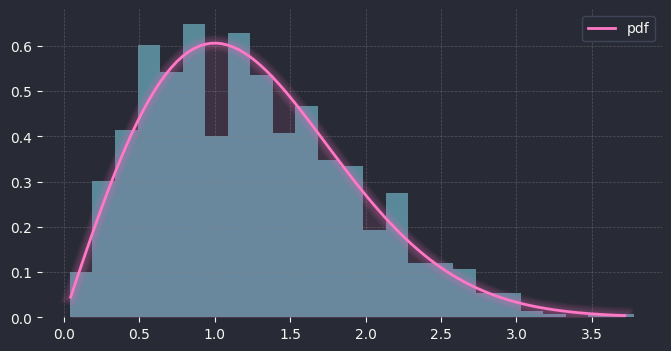

In [3]:
 plot()

## Построение графика по функции

Сгенерировать массивы по функции:<br>
$(x^2 + y^2 - 1)^3 - x^2 y^3 = 0$<br>
и построить на основе них график.

In [4]:
def plot_heart():
    # Define mesh grid.
    x = np.linspace(-1.5, 1.5, 1000)
    y = np.linspace(-1.5, 1.5, 1000)
    X, Y = np.meshgrid(x,y)
    # Define function.
    F = (X**2 + Y**2 - 1)**3 - (X**2)*(Y**3)
    # Plot filled contour.
    plt.contourf(X, Y, F, [-1, 0], colors='deeppink')
    # Style chart.
    plt.box(False)
    plt.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False
    )
    plt.show()

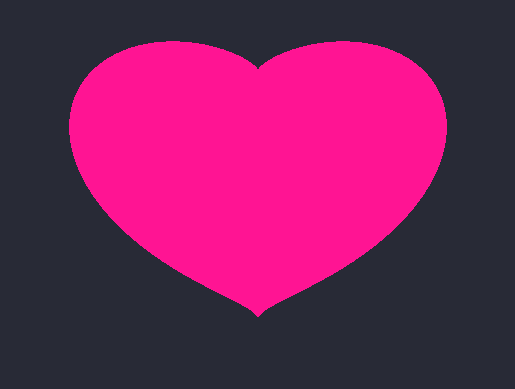

In [5]:
plot_heart()

In [6]:
def plot_heart_sympy():
    from sympy import symbols, Eq
    from sympy.plotting import plot_implicit
    x, y = symbols('x y')
    equation = Eq((x**2 + y**2 - 1)**3 - (x**2)*(y**3), 0)
    plot_implicit(equation, (x, -1.5, 1.5), (y, -1.5, 1.5), line_color='deeppink')

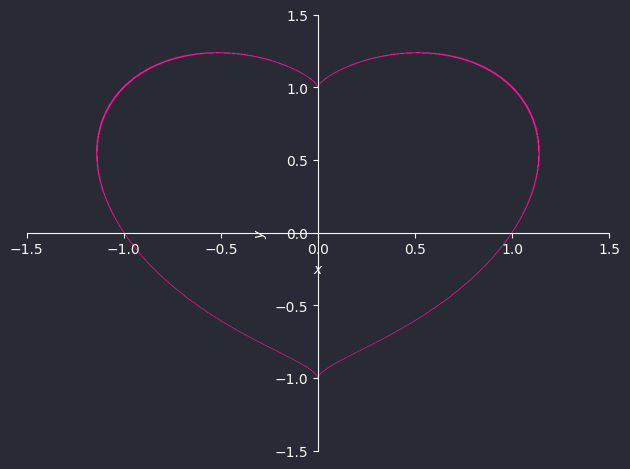

In [7]:
plot_heart_sympy()

### Анализ зависимостей

Найти зависимости представленные в датасете приложенном к заданию.

In [23]:
# Input parameters.
data_path = Path.cwd() / 'dataset_home.txt'
column_names = {'age': 'float', 'sex': 'str', 'bmi': 'float', 'kids': 'int', 'smoker': 'str', 'area': 'str', 'indicator': 'float'}

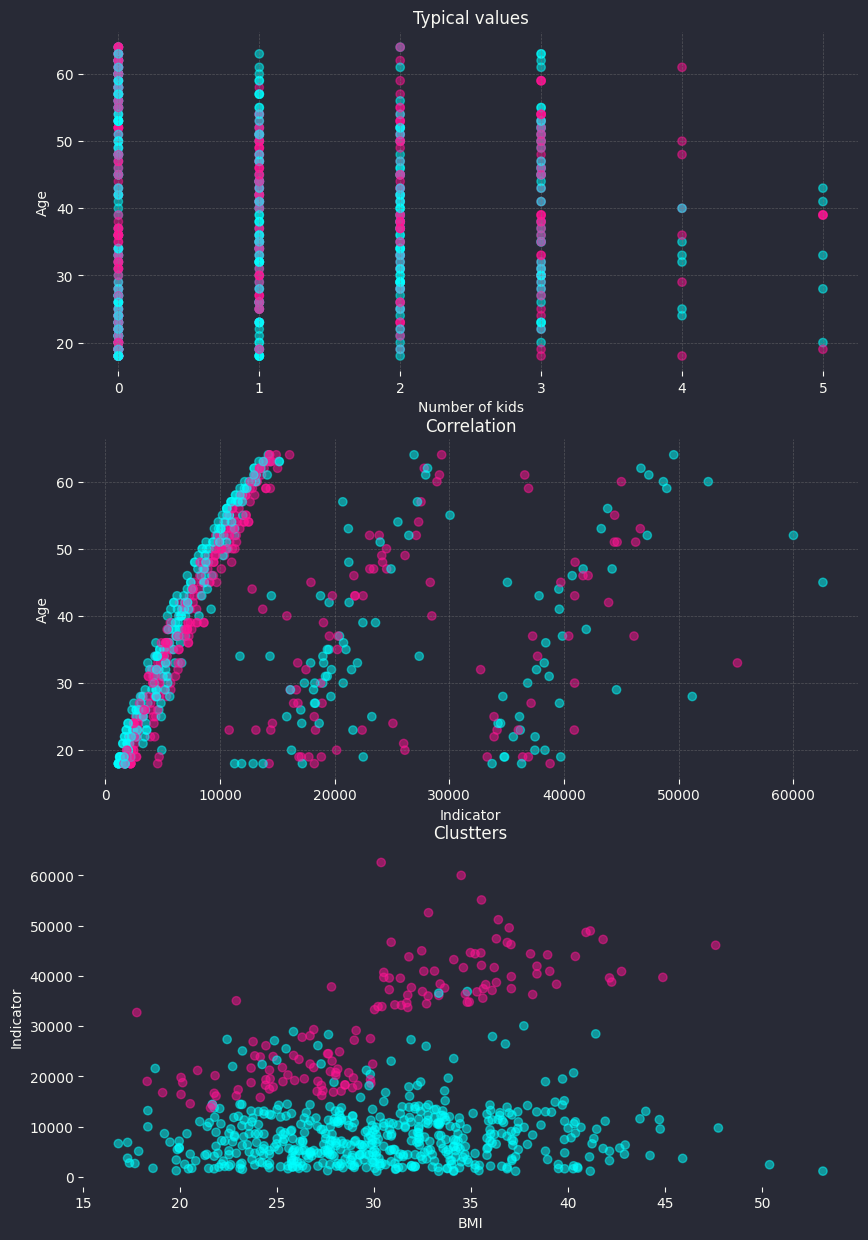

In [89]:
from scipy.signal import savgol_filter

with open(data_path) as file:
    data_ = [line.replace( '\n', '') for line in file.readlines()]

for i, (col, coltype) in enumerate(column_names.items()):
    exec(f"{col} = np.array([{coltype}(line.split(',')[{i}]) for line in data_])")

counts, bins = np.histogram(age[smoker == 'yes'], 46)
yes = savgol_filter(counts, 41, 3)
smokers = age[smoker == 'yes']    

fig, axs = plt.subplots(3, figsize=(10, 15))
axs[0].scatter(kids, age, c=['deeppink' if i == 'female' else 'cyan' for i in sex], alpha=0.5)
axs[0].set_title("Typical values")
axs[0].set_xlabel('Number of kids')
axs[0].set_ylabel('Age')
axs[0].grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
axs[1].scatter(indicator, age, c=['deeppink' if i == 'female' else 'cyan' for i in sex], alpha=0.5)
axs[1].set_title("Correlation")
axs[1].set_xlabel('Indicator')
axs[1].set_ylabel('Age')
axs[1].grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
axs[2].scatter(bmi, indicator, c=['deeppink' if i == 'yes' else 'cyan' for i in smoker], alpha=0.5)
axs[2].set_title("Clustters")
axs[2].set_xlabel('BMI')
axs[2].set_ylabel('Indicator')
for a in axs:
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["left"].set_visible(False)
    a.spines["bottom"].set_visible(False)
plt.show()

In [90]:
# Load data.
data = pd.read_csv(data_path, sep=',', header=None, names=column_names)

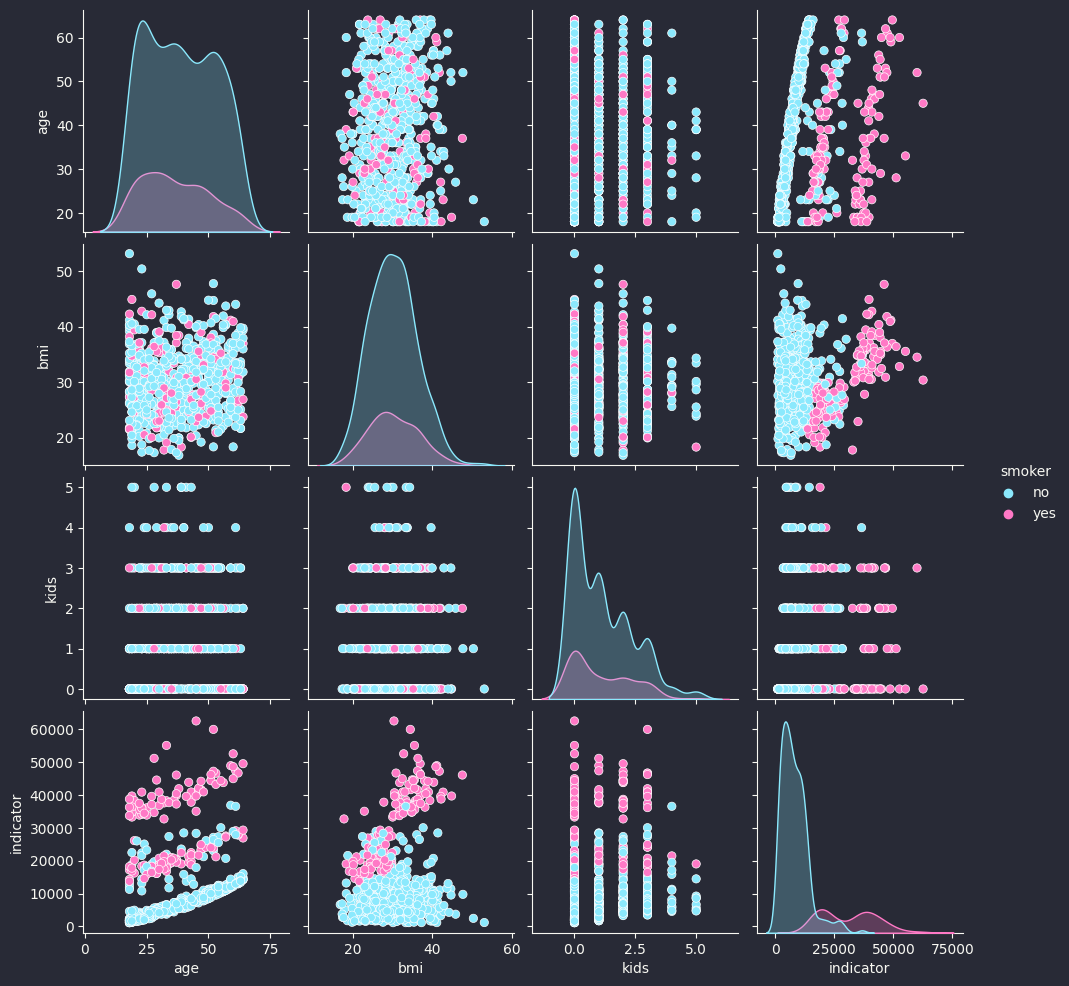

In [91]:
g = sns.pairplot(data, hue='smoker')